# Bepaling van soortelijke warmte van water


# Introductie

Water heeft een enorme buffercapaciteit: je moet veel energie toevoegen om de temperatuur van water een graad te verwarmen. In dit practicum gaan we de soortelijke warmte van water bepalen door een bekende hoeveelheid water te verwarmen met een bekende hoeveelheid energie, en de temperatuurstijging te meten.

# Theorie

Geef hier de natuurkundige achtergrond van het onderwerp. 

$ Q = c * m * \Delta T $

$Q$: benodigde warmte-energie in Joule $(J)$. 

$c$: de soortelijke warmte van de stof in $(J/kgK)$.

$m$: de massa van de stof in kilogram $kg$.

$\Delta T$: het temperatuurverschil in Kelvin $(K)$ of graden Celsius $(\degree C). $

# Methode en materialen

## Ontwerp
Een waterbad met bekende massa aan water wordt verwarmd met een elektrisch verwarmingselement dat een bekende hoeveelheid energie levert.
De temperatuur van het water wordt gemeten met een temperatuursensor.
Door de temperatuurstijging als functie van de tijd te meten kan de soortelijke warmte van water worden berekend.


## Materialen
Hieronder staat de lijst van benodigde materialen bij deze proef:
- Maatbeker
- Weegschaal
- Water
- Elektrisch verwarmingselement ($10 \mathrm{\Omega}$, $10 \mathrm{W}$)
- Voedingsbron 
- Thermometer of temperatuursensor
- Stopwatch of timer

```{figure} Figures/cwater_setup.jpg
width = 70%

Een schematische weergave van de opstelling
```

## Procedure
```{exercise}
1. Beschrijf de procedure die nodig is om de soortelijke warmte van water te bepalen.
2. Geef jouw beschrijving van de procedure aan een ander team, zij verzamelen voor jou de data op basis van de gegevens.
3. Voer het experiment van een ander team uit op basis van hun beschrijving.
4. Analyseer de data die het andere groepje voor jou heeft verzameld.
```


## Veiligheid
We maken gebruik van een $10 \mathrm{\Omega}$, $10 \mathrm{W}$ weerstand.
Deze wordt snel heet.
De bronspanning mag dan ook alleen aan wanneer de weerstand in het water zit.
Raak de weerstand niet aan tijdens het experiment.
Omdat de weerstand in het water zit, kunnen we wel het elektrisch vermogen hoger zetten zonder dat de weerstand oververhit raakt.
Het maximaal vermogen mag $40 \mathrm{W}$ zijn.
Daarbij moet de roerder wel aanstaan om de warmte goed te verdelen.

## Data analyse
Geef kort de data-analysemethode weer.

# Resultaten


c = 7912.71 ± 189.93 J/(kg K)


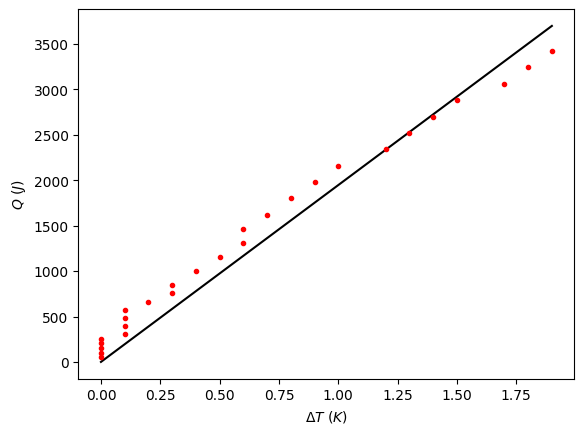

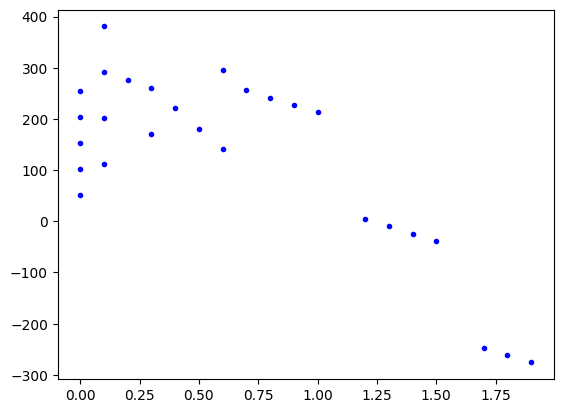

In [6]:
# Hier de data en de analyse
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit


# data
data = np.loadtxt('metingen/Soortwater.csv',delimiter=';',skiprows=1)
times = data[:,0]  # tijd in s
temps = data[:,1] + 273.15  # temperatuur in K
U = data[:,2]  # spanning in V
R = 10 # weerstand in Ohm
m = 246.1/1000  # massa in kg
dt = 5 # tijd in s

# verwerken
dT = temps - temps[0]
I = U / R
P = U * I
dQ = P * dt  # energie in J
Q = np.cumsum(dQ)

# fit
def func(dT,c):
    return c * m * dT
var, covar = curve_fit(func,dT,Q)
x_fit = np.linspace(np.min(dT),np.max(dT),1000)
y_fit = func(x_fit,*var)
plt.plot(x_fit,y_fit,'k-',label='fit')
plt.plot(dT,Q,'r.',label='data')
plt.xlabel(r'$\Delta T$ $(K)$')
plt.ylabel(r'$Q$ $(J)$')

# resultaten
c = var
u_c = np.sqrt(np.diag(covar))
print(f'c = {c[0]:.2f} ± {u_c[0]:.2f} J/(kg K)')

r = Q - func(dT,*var)
plt.figure()
plt.plot(dT,r,'b.')


In [ ]:
# Sla figuren op met  
# 
# plt.savefig("figures/naam.png", dpi=450)



# Discussie en conclusie

Hier een korte discussie en conclusie over de resultaten van het experiment en de implicaties daarvan.